### Imports/Modules

In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

### Loading the dataset

In [484]:
df = pd.read_csv("Housing.csv")

In [485]:
len(df)

545

<Axes: >

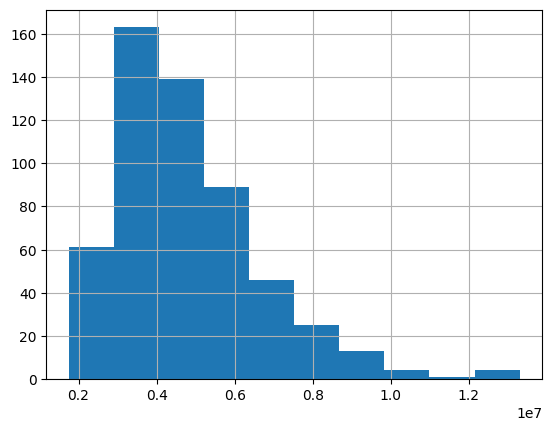

In [486]:
df['price'].hist()

In [487]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [488]:
df.isna().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [489]:
int(df.duplicated().sum())


0

### Handling the categorical variables


In [490]:
from sklearn.preprocessing import LabelEncoder
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [491]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [492]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [493]:
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [494]:
df = df.drop("furnishingstatus_unfurnished", axis=1)

In [495]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [496]:
X = df.drop("price", axis=1)
y = df["price"]

### Train/test/validation -split


In [497]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Create a neural network structure

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

callback_list = [mc]

variable_amount = len(X.columns)
model = keras.Sequential(
    [   
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse')
model.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 13)             │            52 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,173 (4.58 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 26 (104.00 B)

### Train the neural network

In [ ]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/800


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 26771135135744.0000 - val_loss: 24315110096896.0000
Epoch 2/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26771130941440.0000 - val_loss: 24315105902592.0000
Epoch 3/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26771126747136.0000 - val_loss: 24315105902592.0000
Epoch 4/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26771126747136.0000 - val_loss: 24315103805440.0000
Epoch 5/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26771122552832.0000 - val_loss: 24315099611136.0000
Epoch 6/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26771118358528.0000 - val_loss: 24315093319680.0000
Epoch 7/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26771112067072.0000 - val_loss: 24315082833920.0000
Epoch 8/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26771099484160.0000 - val_loss: 24315072348160.0000
Epoch 9/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26771091095552.0000 - val_loss: 24315057668096.0000
Epoch 10/80

### Perfromance and Error Metrics

<Axes: >

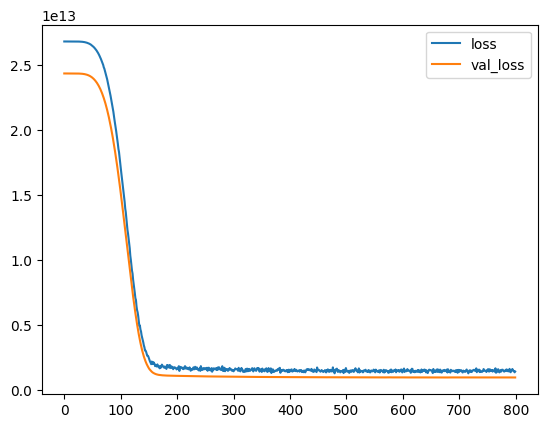

In [500]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [501]:
from keras.models import load_model
model = load_model("best_model.keras")

In [502]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1099987550208.0

Train data evaluation:
1170956615680.0


In [503]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


,Test True Y,Model Predictions
0,7490000,7363605.50
1,5250000,4830007.50
2,3570000,5698688.50
3,4620000,5532693.00
4,7455000,4846573.00
...,...,...
77,12250000,10191113.00
78,6440000,4671765.50
79,6650000,4980879.00
80,1890000,2516482.75


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

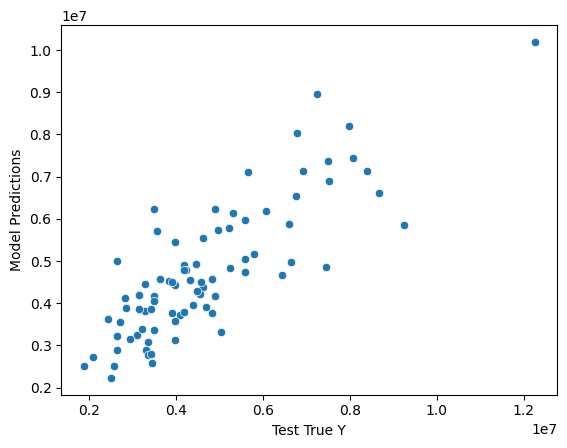

In [504]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [505]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
810025.62 $

MSE
1099987288064.0 $^2

RMSE:
1048802.79 $

R-squared:
0.68

Explained variance score:
0.68


C:\Users\Timothy\AppData\Local\Temp\ipykernel_21456\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


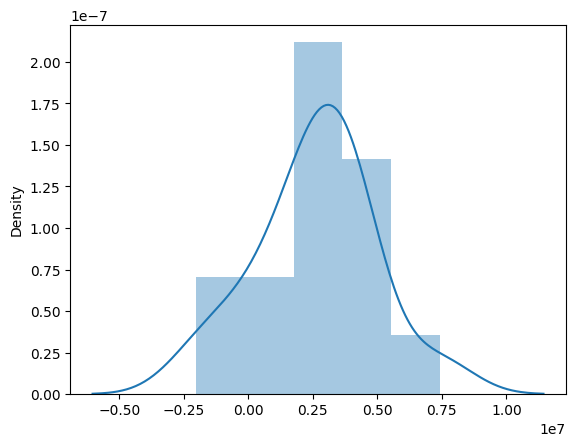

In [506]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

### Trying the model in practice with new imaginary house

In [507]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1


In [508]:
tester_row = {
    'area': 7420, 
    'bedrooms': 4, 
    'bathrooms': 2, 
    'stories': 3, 
    'mainroad': 1,
    'guestroom': 0, 
    'basement': 0, 
    'hotwaterheating': 0, 
    'airconditioning': 1,
    'parking': 2,
    'prefarea': 1,
    'furnishingstatus_furnished': 1,
    'furnishingstatus_semi-furnished:': 0
}

tester_row = pd.DataFrame([tester_row])

In [509]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated house price with this example:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Estimated house price with this example:
$ 7951021.0
----------------
